In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import pandas as pd
from scipy.optimize import curve_fit

from astropy.stats import sigma_clipped_stats

from astropy.table import Table
from make_cuts import choosef, random_apers, get_names, radec_minmax, cuts

from astroML.plotting import MultiAxes

In [3]:
from matplotlib import rc                # Establece parámetros iniciales al grupo
rc('text', usetex=False)
SMALL_SIZE = 15
MEDIUM_SIZE = 20
BIGGER_SIZE = 25
plt.rc('font', family='serif')
plt.rc('font', size=SMALL_SIZE)          # Controla tamaño de texto por defecto
plt.rc('axes', titlesize=BIGGER_SIZE)    # Tamaño de las fuentes de los títulos
# Tamaño de las fuentes de los ejes x e y
plt.rc('axes', labelsize=MEDIUM_SIZE)
plt.rc('xtick', labelsize=SMALL_SIZE)    # Tamaño de los tick en el eje x
plt.rc('ytick', labelsize=SMALL_SIZE)    # Tamaño de los tick en el eje y
plt.rc('legend', fontsize=SMALL_SIZE)    # Tamaño de las leyendas
# Tamaño de la fuente del título de la figura
plt.rc('figure', titlesize=BIGGER_SIZE)

In [4]:
df = Table.read('crossmatch_mag.fits') # el error es 1 arcsec


In [5]:
mask =  df['CLASS_STAR'] > 0.95
dfs = df[mask]

In [6]:
#NSF
mag_NB = dfs['MAG_AUTO']
mag_g = dfs['MAG_AUTO_g_1']
mag_r = dfs['MAG_AUTO_r_1']
mag_i = dfs['MAG_AUTO_i_1']
mag_z = dfs['MAG_AUTO_z_1']
mag_y = dfs['MAG_AUTO_y_1']

#NOAO
mag_ag = dfs['mag_auto_g_2']
mag_ar = dfs['mag_auto_r_2']
mag_ai = dfs['mag_auto_i_2']
mag_az = dfs['mag_auto_z_2']
mag_ay = dfs['mag_auto_y_2']


mag_nsf = [mag_g, mag_r, mag_i, mag_z, mag_y, mag_NB]
mag_noao = [mag_ag, mag_ar, mag_ai, mag_az, mag_ay, mag_az]
nombres = ['g', 'r', 'i', 'z', 'y', 'NB']

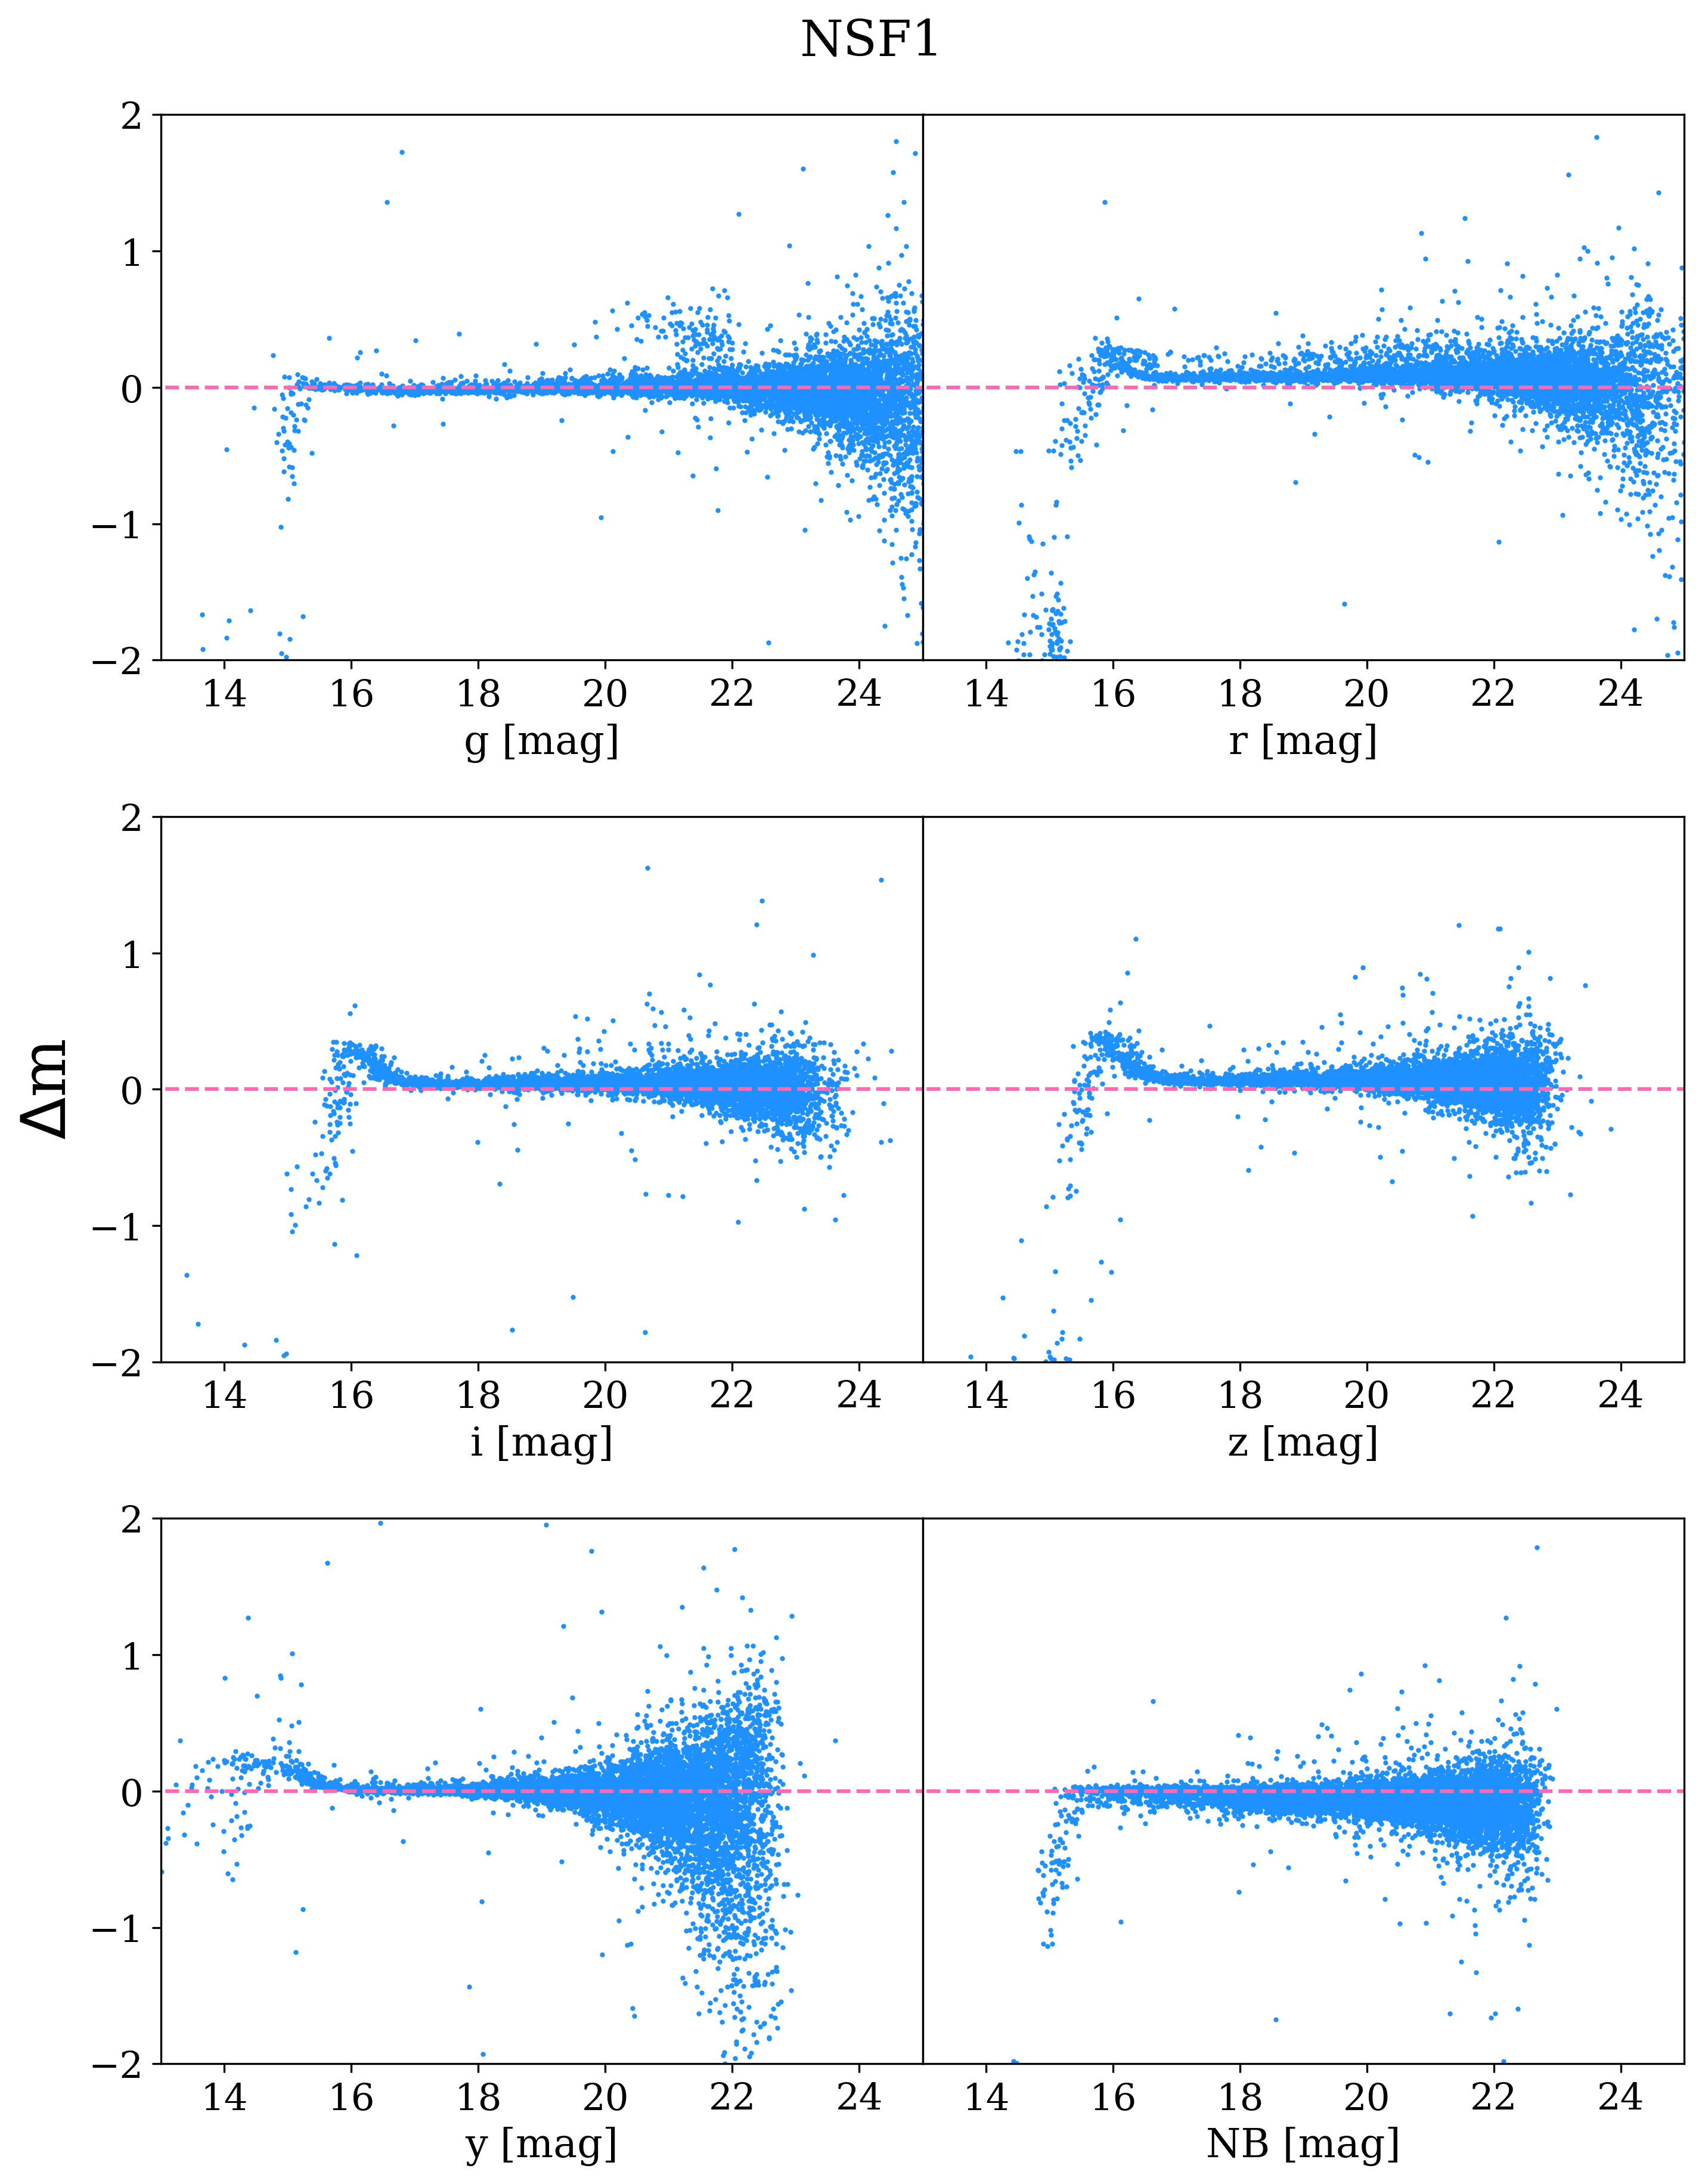

In [7]:
fig,ax=plt.subplots(ncols =2, nrows =3,figsize=(10,12),facecolor= 'w', dpi=300)

for i, mag in enumerate(mag_nsf):
    #mask = mag < 40
    ax[i//2][i-2*(i//2)].scatter(mag_nsf[i],mag_nsf[i]-mag_noao[i], color = 'dodgerblue', s= 1)
    #ax.hist(np.log10(dist_star), bins = 20 , color = 'mediumslateblue',  label = 'Estrellas', ec = 'white')
    #ax[i//2][i-2*(i//2)].set_title(nombres[i], size = 16)
    ax[i//2][i-2*(i//2)].set_xlabel(f'{nombres[i]} [mag]', size = 16)
    ax[1][0].set_ylabel(r'$\Delta$m', size = 25)
    ax[i//2][i-2*(i//2)].set_xlim(13,25)
    ax[i//2][i-2*(i//2)].set_ylim(-2,2)
    ax[i//2][i-2*(i//2)].hlines(0,0,100, linestyles = 'dashed', color = 'hotpink')
    if i in [1,3,5]:
        ax[i//2][i-2*(i//2)].set_yticks([])
        ax[i//2][i-2*(i//2)].set_ylabel('')
        
#     if i in [0,1,2]:
#         ax[i//2][i-2*(i//2)].set_xticks([])
#         ax[i//2][i-2*(i//2)].set_xlabel('')
    #ax.grid(True, ls = ':')
    #ax[i//2][i-2*(i//2)].legend(fontsize = 15, loc=2)
    #ax[2,1].set_axis_off()
    

fig.tight_layout()    
plt.subplots_adjust(wspace=0)
plt.suptitle('NSF1', fontsize = 20, y = 1.02)
plt.show()

In [8]:
def func(x,a):
    return a

In [9]:
keys = ['MAG_AUTO_g_1','MAG_AUTO_r_1','MAG_AUTO_i_1','MAG_AUTO_z_1','MAG_AUTO_y_1', 'MAG_AUTO']
keys_2 = ['mag_auto_g_2','mag_auto_r_2','mag_auto_i_2','mag_auto_z_2','mag_auto_y_2', 'mag_auto_z_2']
sigmas = []
fit_line = []

#fig,ax=plt.subplots(ncols =1, nrows =1,figsize=(10,12),facecolor= 'w', dpi=300)

for i, mag in enumerate(mag_nsf):  
    mask1 = (mag >= 17) & (mag <= 19) & (mag-mag_noao[i] > -0.2) & (mag-mag_noao[i] < 0.2)
    n_dfs = dfs[mask1]

    magnsf = n_dfs[keys[i]]
    magnoao = n_dfs[keys_2[i]]
    diff_ = magnsf-magnoao
    
    mask2 = (diff_ > -0.2) & (diff_ < 0.2)
    
    errors = sigma_clipped_stats(np.array(magnsf-magnoao), sigma=3, cenfunc ='median')
    sigmas.append(errors)

    
    popt, pcov = curve_fit(func, magnsf, diff_)
    fit_line.append(popt)
    print(popt)

[-0.01244268]
[0.07859317]
[0.03795725]
[0.06463521]
[0.00894012]
[-0.03648451]


In [10]:
sigmas

[(-0.015220594856472256, -0.017256187866209416, 0.016061231808979778),
 (0.0758148011453919, 0.07466706359863196, 0.013842567795712019),
 (0.035773438595336715, 0.03460720935058603, 0.013386041441166728),
 (0.06207473276695643, 0.061124291992186386, 0.014680247006106213),
 (0.007809323951440694, 0.007564384765625931, 0.027215289999847826),
 (-0.03669274166577601, -0.029906760925292986, 0.05452735106803254)]

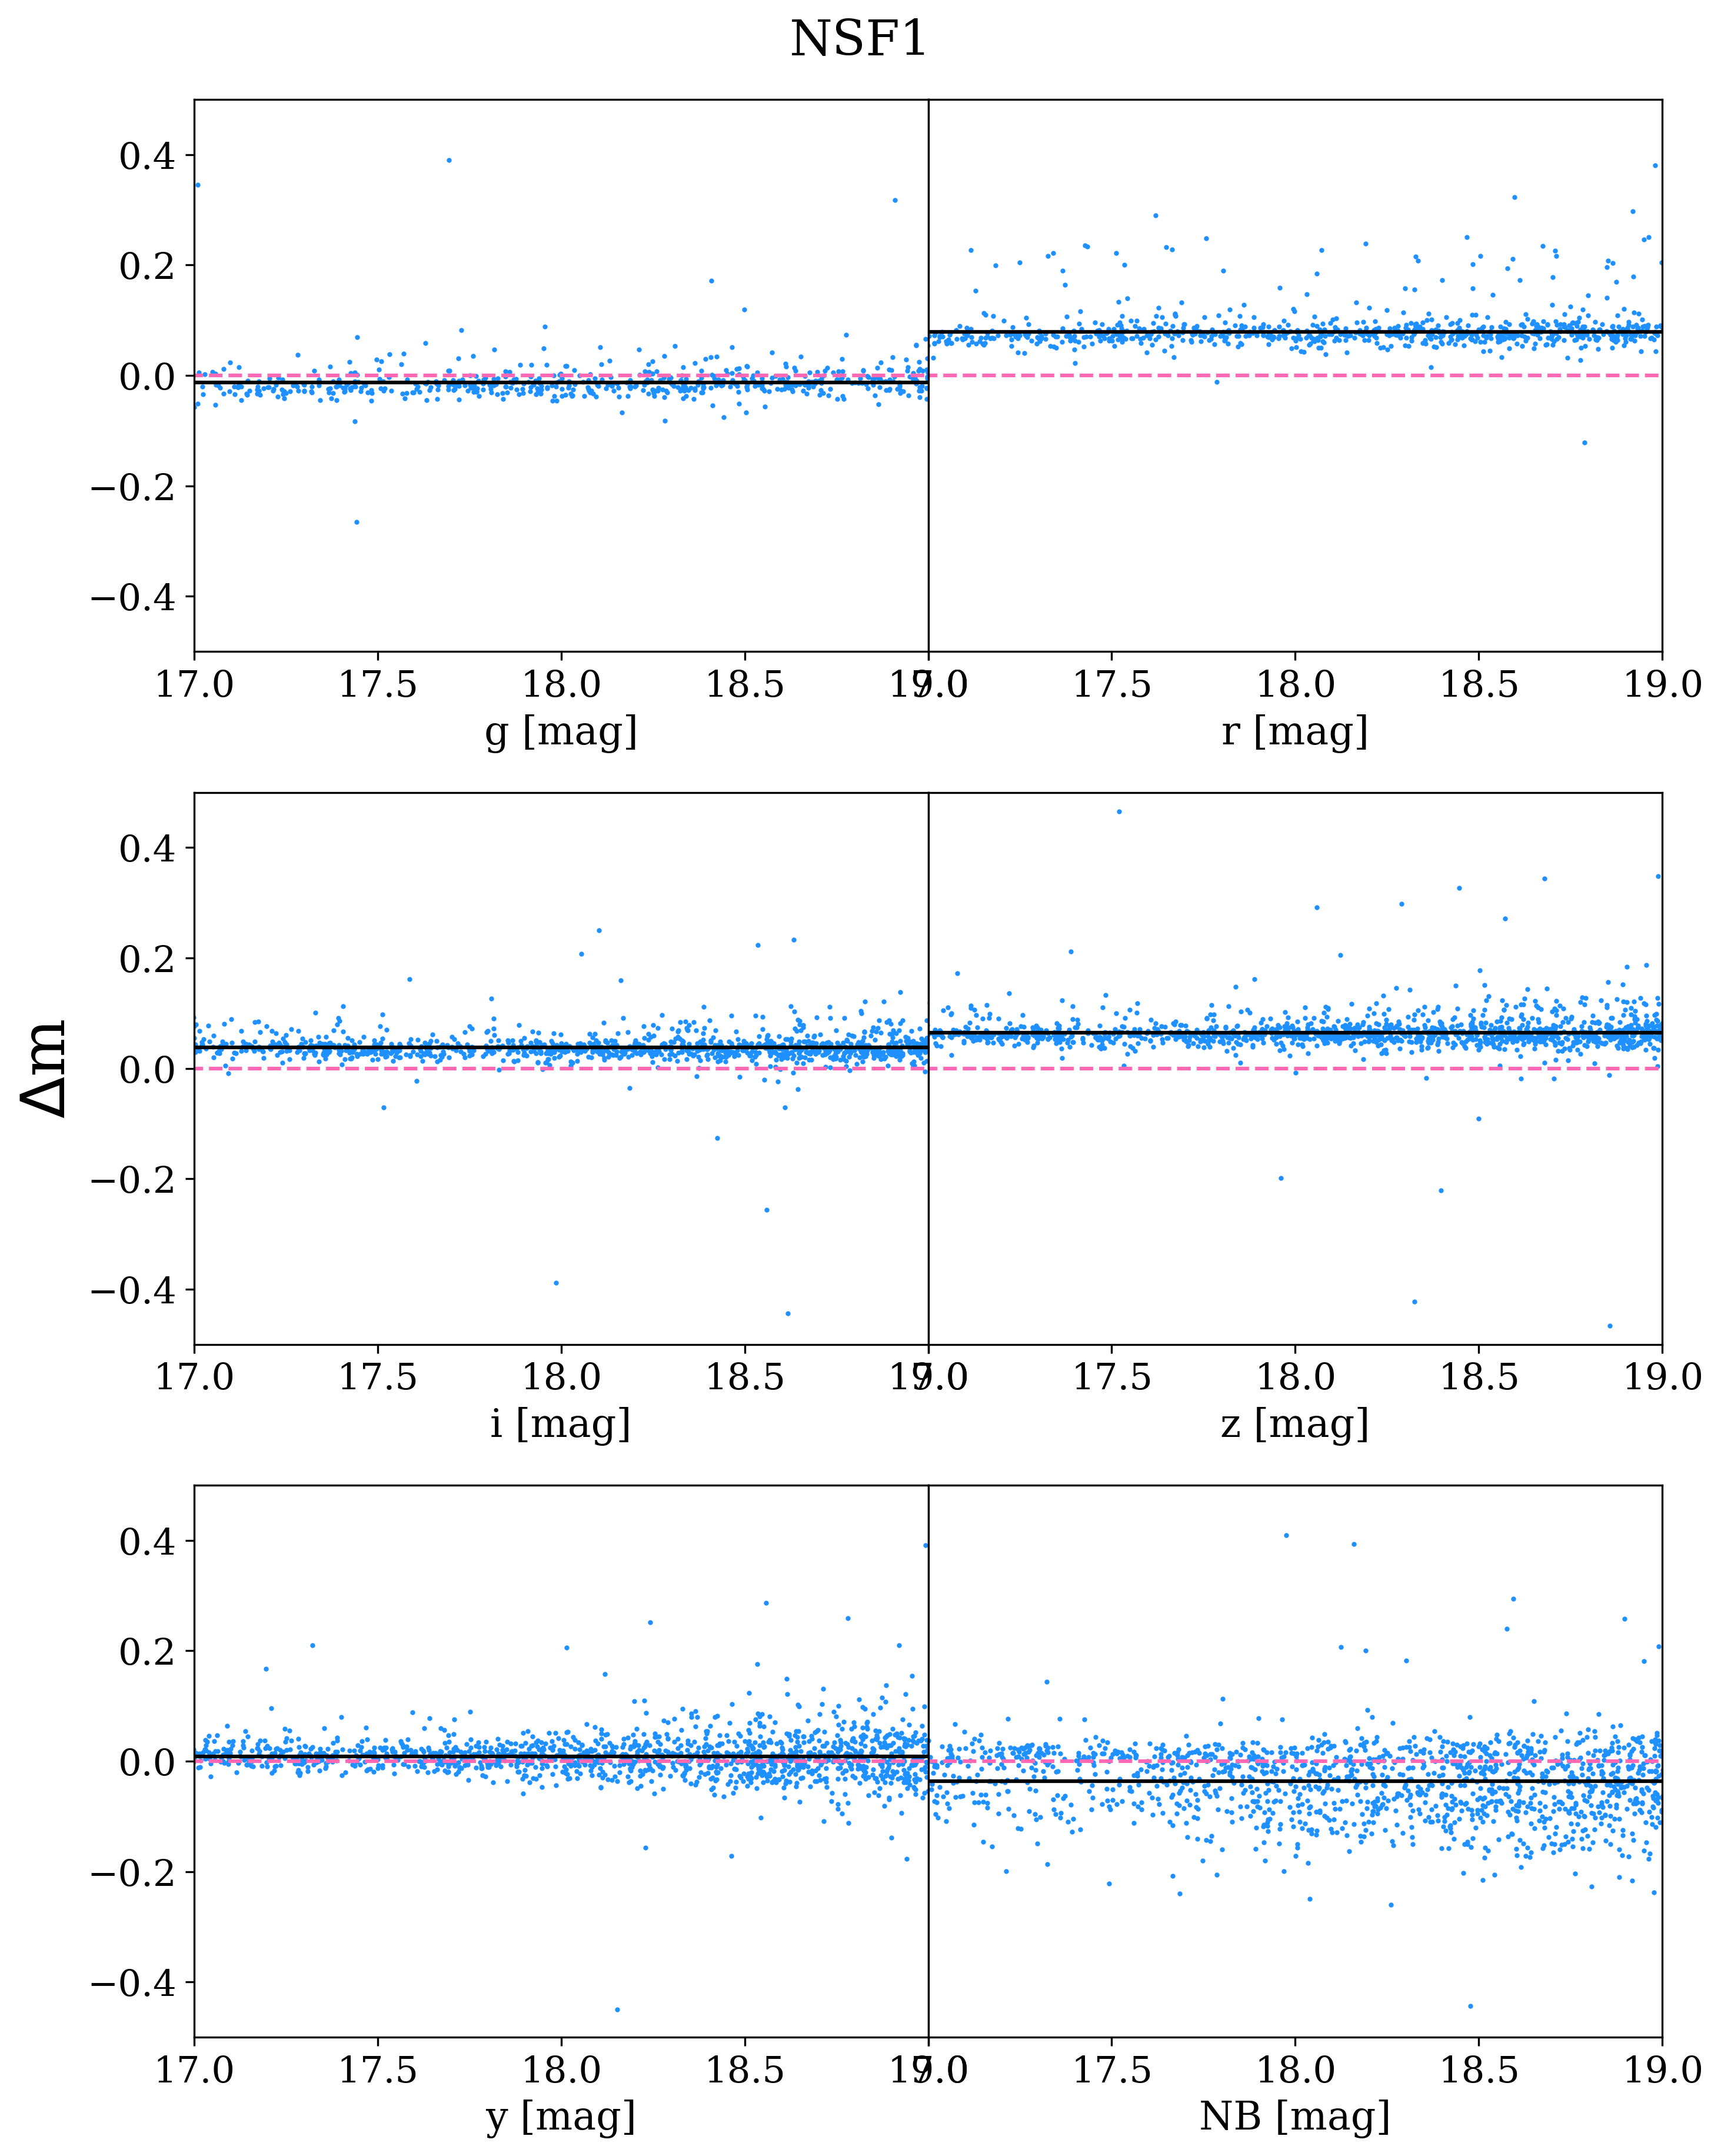

In [11]:
fig,ax=plt.subplots(ncols =2, nrows =3,figsize=(10,12),facecolor= 'w', dpi=300)

for i, mag in enumerate(mag_nsf):
    #mask = mag < 40
    ax[i//2][i-2*(i//2)].scatter(mag_nsf[i],mag_nsf[i]-mag_noao[i], color = 'dodgerblue', s= 1)
    #ax.hist(np.log10(dist_star), bins = 20 , color = 'mediumslateblue',  label = 'Estrellas', ec = 'white')
    #ax[i//2][i-2*(i//2)].set_title(nombres[i], size = 16)
    ax[i//2][i-2*(i//2)].set_xlabel(f'{nombres[i]} [mag]', size = 16)
    ax[i//2][i-2*(i//2)].hlines(fit_line[i],12,26)
    ax[1][0].set_ylabel(r'$\Delta$m', size = 25)
    ax[i//2][i-2*(i//2)].set_xlim(17,19)
    ax[i//2][i-2*(i//2)].set_ylim(-0.5,0.5)
    ax[i//2][i-2*(i//2)].hlines(0,0,100, linestyles = 'dashed', color = 'hotpink')
    if i in [1,3,5]:
        ax[i//2][i-2*(i//2)].set_yticks([])
        ax[i//2][i-2*(i//2)].set_ylabel('')
        
#     if i in [0,1,2]:
#         ax[i//2][i-2*(i//2)].set_xticks([])
#         ax[i//2][i-2*(i//2)].set_xlabel('')
    #ax.grid(True, ls = ':')
    #ax[i//2][i-2*(i//2)].legend(fontsize = 15, loc=2)
    #ax[2,1].set_axis_off()
    

fig.tight_layout()    
plt.subplots_adjust(wspace=0)
plt.suptitle('NSF1', fontsize = 20, y = 1.02)
plt.show()



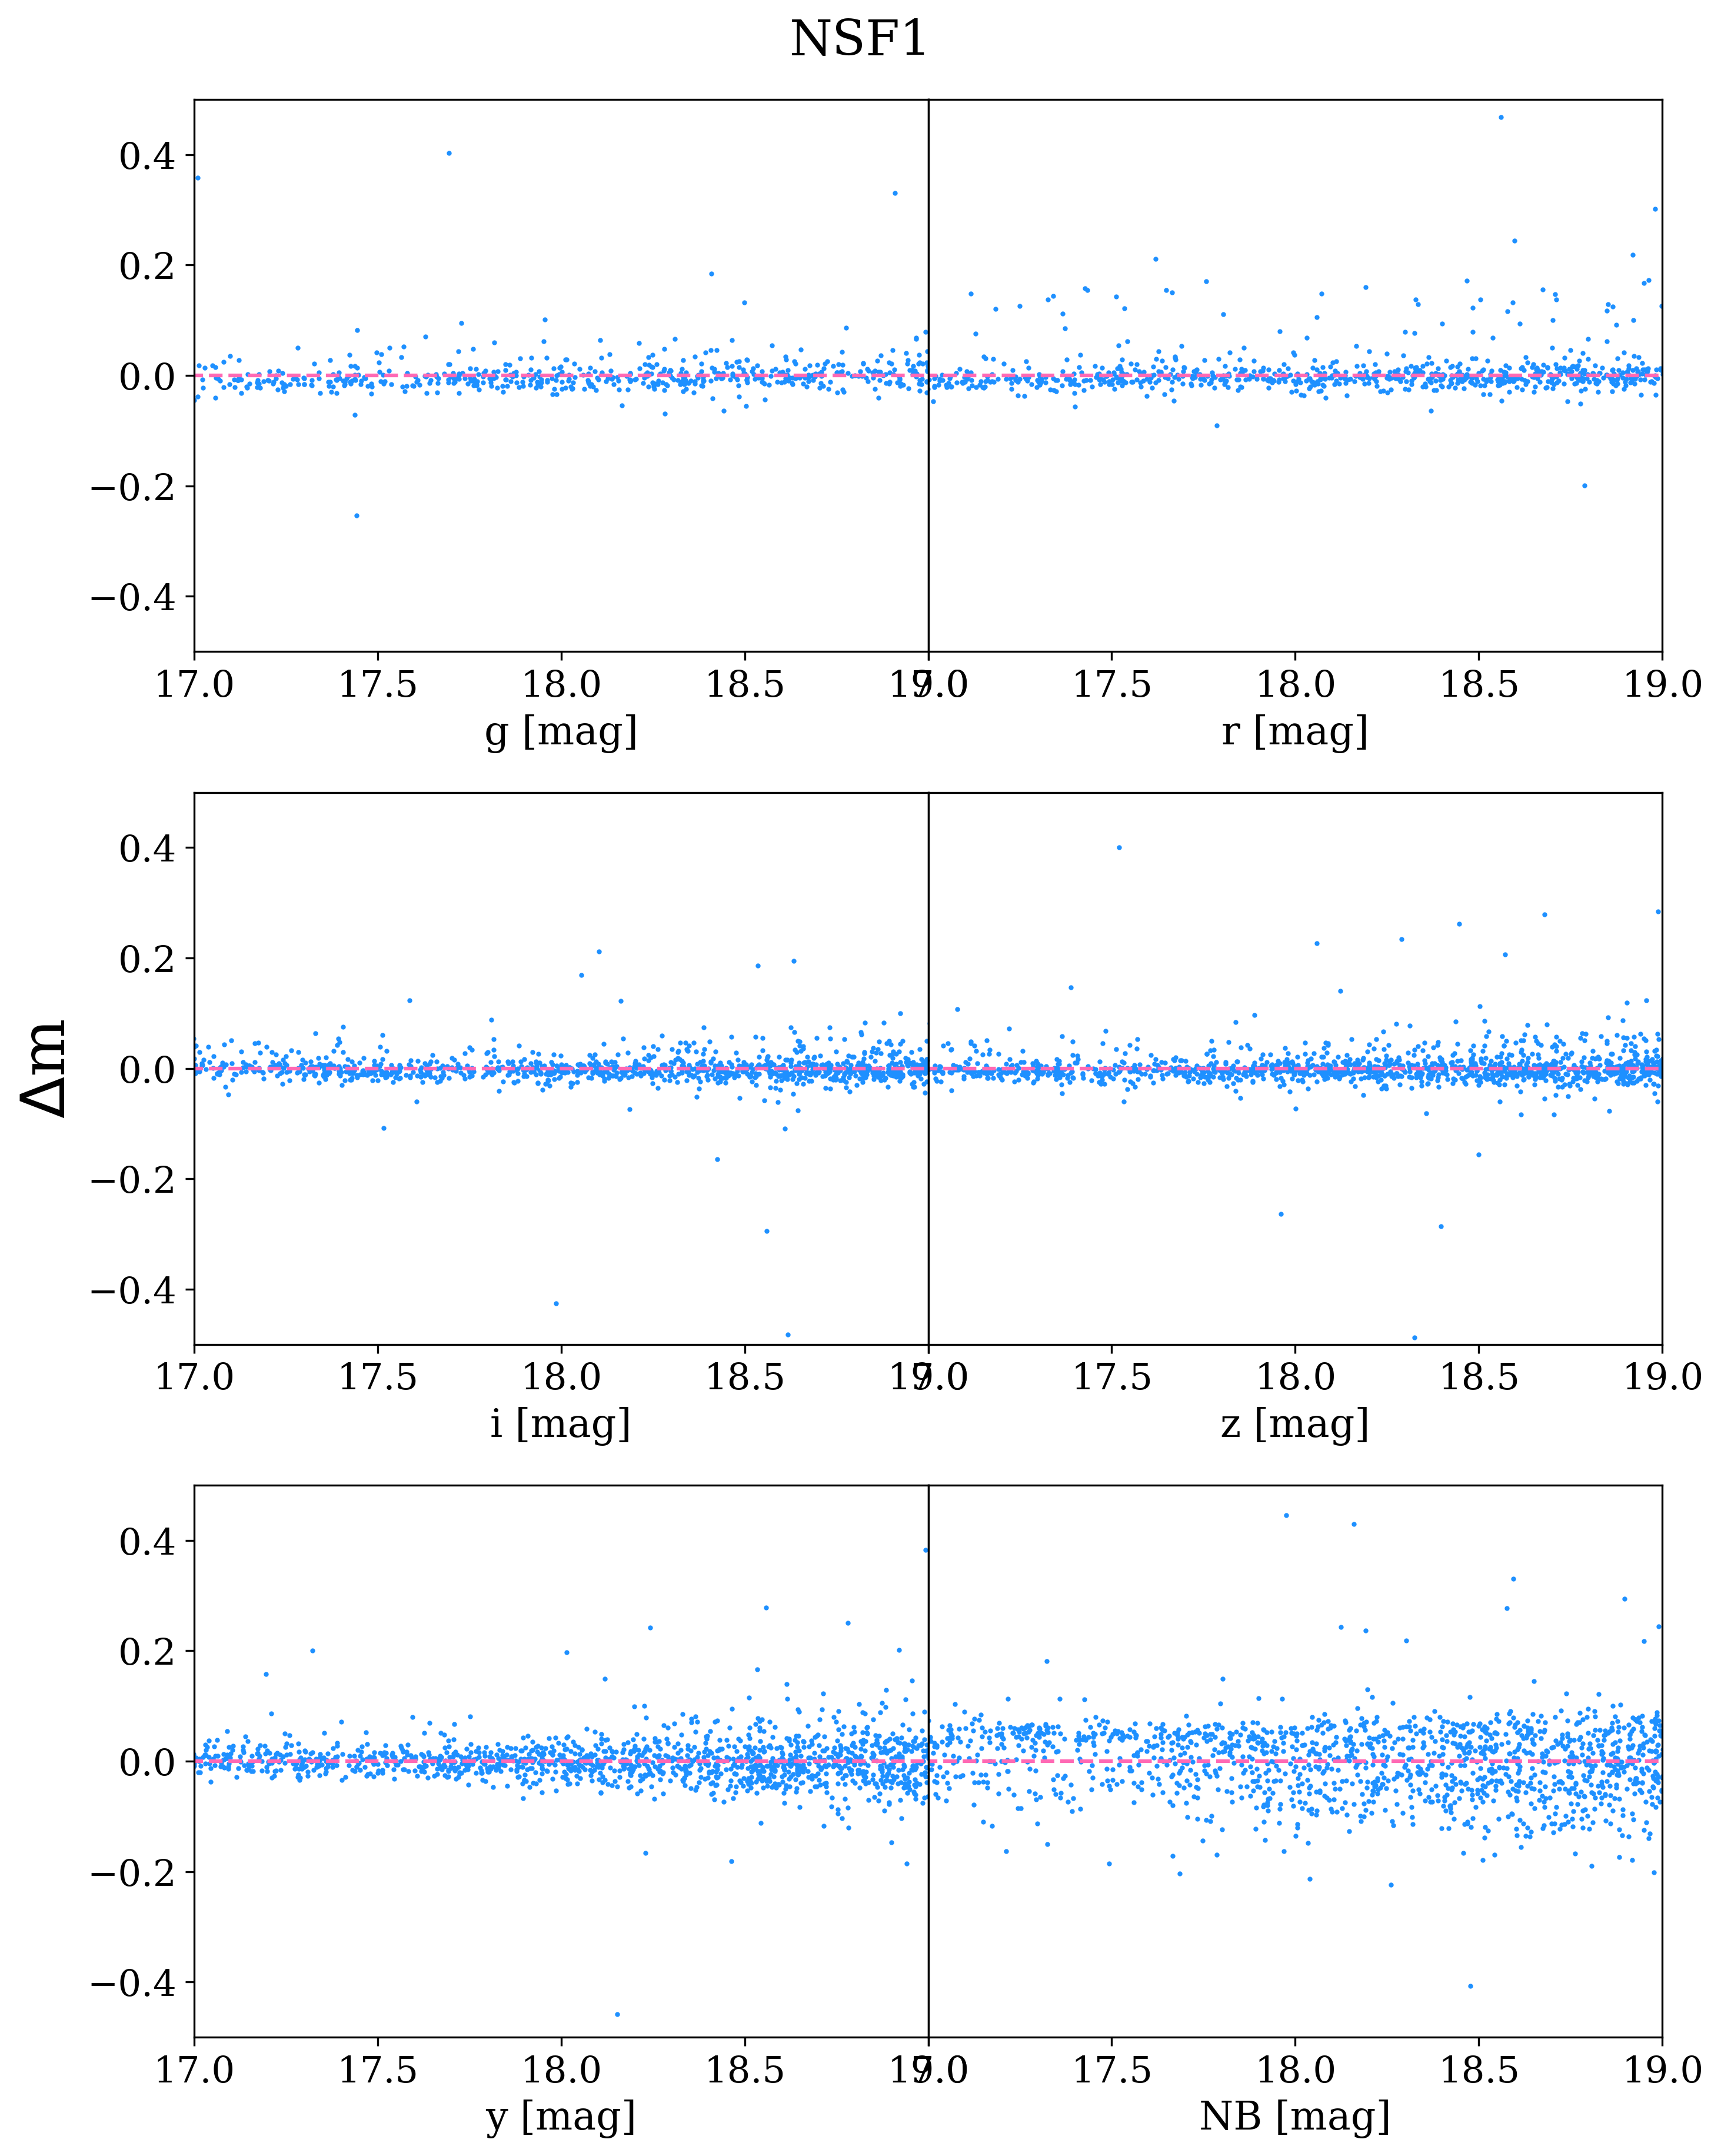

In [12]:
fig,ax=plt.subplots(ncols =2, nrows =3,figsize=(10,12),facecolor= 'w', dpi=300)

for i, mag in enumerate(mag_nsf):
    #mask = mag < 40
    ax[i//2][i-2*(i//2)].scatter(mag_nsf[i],mag_nsf[i]-mag_noao[i]-fit_line[i], color = 'dodgerblue', s= 1)
    #ax.hist(np.log10(dist_star), bins = 20 , color = 'mediumslateblue',  label = 'Estrellas', ec = 'white')
    #ax[i//2][i-2*(i//2)].set_title(nombres[i], size = 16)
    ax[i//2][i-2*(i//2)].set_xlabel(f'{nombres[i]} [mag]', size = 16)
    #ax[i//2][i-2*(i//2)].hlines(fit_line[i],12,26)
    ax[1][0].set_ylabel(r'$\Delta$m', size = 25)
    ax[i//2][i-2*(i//2)].set_xlim(17,19)
    ax[i//2][i-2*(i//2)].set_ylim(-0.5,0.5)
    ax[i//2][i-2*(i//2)].hlines(0,0,100, linestyles = 'dashed', color = 'hotpink')
    if i in [1,3,5]:
        ax[i//2][i-2*(i//2)].set_yticks([])
        ax[i//2][i-2*(i//2)].set_ylabel('')
        
#     if i in [0,1,2]:
#         ax[i//2][i-2*(i//2)].set_xticks([])
#         ax[i//2][i-2*(i//2)].set_xlabel('')
    #ax.grid(True, ls = ':')
    #ax[i//2][i-2*(i//2)].legend(fontsize = 15, loc=2)
    #ax[2,1].set_axis_off()
    

fig.tight_layout()    
plt.subplots_adjust(wspace=0)
plt.suptitle('NSF1', fontsize = 20, y = 1.02)
plt.show()


In [13]:
data = Table.read('May_NSF_cat.fits')

In [14]:
fit_line

[array([-0.01244268]),
 array([0.07859317]),
 array([0.03795725]),
 array([0.06463521]),
 array([0.00894012]),
 array([-0.03648451])]

In [15]:
key_cat = ['MAG_AUTO_g','MAG_AUTO_r','MAG_AUTO_i','MAG_AUTO_z','MAG_AUTO_y', 'MAG_AUTO']
for i in range(len(fit_line)):   
    data[key_cat[i]] = data[key_cat[i]] - fit_line[i]

In [16]:
data

NUMBER,FLUX_ISO,FLUXERR_ISO,MAG_ISO,MAGERR_ISO,FLUX_APER [13],FLUXERR_APER [13],MAGERR_APER [13],MAG_APER [13],FLUX_AUTO,FLUXERR_AUTO,MAG_AUTO,MAGERR_AUTO,BACKGROUND,ALPHAPEAK_J2000,DELTAPEAK_J2000,X_IMAGE,Y_IMAGE,ALPHA_J2000,DELTA_J2000,FLAGS,ELONGATION,ELLIPTICITY,CLASS_STAR,FLUX_RADIUS,SNR_WIN,MAG_APER_g [13],FLUX_APER_g [13],FLUXERR_APER_g [13],MAGERR_APER_g [13],MAGERR_AUTO_g,BACKGROUND_g,MAG_AUTO_g,MAG_APER_r [13],FLUX_APER_r [13],FLUXERR_APER_r [13],MAGERR_APER_r [13],MAGERR_AUTO_r,BACKGROUND_r,MAG_AUTO_r,MAG_APER_i [13],FLUX_APER_i [13],FLUXERR_APER_i [13],MAGERR_APER_i [13],MAGERR_AUTO_i,BACKGROUND_i,MAG_AUTO_i,MAG_APER_z [13],FLUX_APER_z [13],FLUXERR_APER_z [13],MAGERR_APER_z [13],MAGERR_AUTO_z,BACKGROUND_z,MAG_AUTO_z,MAG_APER_y [13],FLUX_APER_y [13],FLUXERR_APER_y [13],MAGERR_APER_y [13],MAGERR_AUTO_y,BACKGROUND_y,MAG_AUTO_y
int32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float32,float32,float64,float64,float32,float32,float64,float64,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float32,float32,float32,float32,float32,float32,float64,float32,float32,float32,float32,float32,float32,float64,float32,float32,float32,float32,float32,float32,float64,float32,float32,float32,float32,float32,float32,float64
33,25371.93,41.176613,15.989117,0.0017624912,12147.249 .. 64525.285,0.07789323 .. 27.471897,6.9638845e-06 .. 0.00046236886,16.788805 .. 14.975676,67369.46,40.653408,14.965327049858619,0.00065533555,0.08886601,316.4943475467248,-67.12021249322032,18687.314,1257.5382,316.49428767323406,-67.12017194466898,3,1.2685443,0.21169484,0.96235716,3.5241532,22634.533,99.0 .. 99.0,0.0 .. 0.0,0.0 .. 0.0,99.0 .. 99.0,99.0,-0.010957605,99.01244267669877,99.0 .. 99.0,0.0 .. 0.0,0.0 .. 0.0,99.0 .. 99.0,99.0,-0.018736891,98.92140683286856,99.0 .. 99.0,0.0 .. 0.0,0.0 .. 0.0,99.0 .. 99.0,99.0,-0.021660982,98.96204274731609,99.0 .. 99.0,0.0 .. 0.0,0.0 .. 0.0,99.0 .. 99.0,99.0,-0.021635406,98.93536478855081,99.0 .. 99.0,0.0 .. 0.0,0.0 .. 0.0,99.0 .. 99.0,99.0,-0.024936497,98.99105987918307
135,2518.994,16.678461,18.496933,0.0071904934,5574.0293 .. 50005.195,0.03935403 .. 12.417513,7.66743e-06 .. 0.00026968034,17.634577 .. 15.252462,56612.305,48.039543,15.154207016594459,0.00092154776,0.6956214,315.96744121982,-67.11501285183257,21420.979,1290.3885,315.967247346567,-67.11513240941288,3,5.9096284,0.8307846,0.9972378,6.874988,8490.516,99.0 .. 99.0,0.0 .. 0.0,0.0 .. 0.0,99.0 .. 99.0,99.0,0.0073003513,99.01244267669877,99.0 .. 99.0,0.0 .. 0.0,0.0 .. 0.0,99.0 .. 99.0,99.0,0.032285124,98.92140683286856,99.0 .. 99.0,0.0 .. 0.0,0.0 .. 0.0,99.0 .. 99.0,99.0,-0.0056184693,98.96204274731609,99.0 .. 99.0,0.0 .. 0.0,0.0 .. 0.0,99.0 .. 99.0,99.0,0.020777551,98.93536478855081,99.0 .. 99.0,0.0 .. 0.0,0.0 .. 0.0,99.0 .. 99.0,99.0,0.073155195,98.99105987918307
145,34997.438,49.97494,15.63991,0.0015507645,3590.5474 .. 72399.33,4.601743 .. 27.099678,0.0013918472 .. 0.00040649896,18.112099 .. 14.850664,93526.836,58.038876,14.60914399779563,0.00067392655,0.58290493,316.35542442777046,-67.11512852086712,19409.346,1316.0988,316.3551611985109,-67.11526998210195,3,1.2301828,0.18711263,0.9623149,4.7684255,21143.678,99.0 .. 99.0,0.0 .. 0.0,0.0 .. 0.0,99.0 .. 99.0,99.0,0.011759858,99.01244267669877,99.0 .. 99.0,0.0 .. 0.0,0.0 .. 0.0,99.0 .. 99.0,99.0,0.014065191,98.92140683286856,99.0 .. 99.0,0.0 .. 0.0,0.0 .. 0.0,99.0 .. 99.0,99.0,-0.0033426727,98.96204274731609,99.0 .. 99.0,0.0 .. 0.0,0.0 .. 0.0,99.0 .. 99.0,99.0,0.016973913,98.93536478855081,99.0 .. 99.0,0.0 .. 0.0,0.0 .. 0.0,99.0 .. 99.0,99.0,0.021552963,98.99105987918307
230,16519.78,20.817684,16.454988,0.0013685416,14068.273 .. 74212.18,0.020095147 .. 21.41263,1.5512444e-06 .. 0.00031334636,16.629398 .. 14.8238125,74610.734,23.756893,14.85448148406272,0.00034579457,0.31271324,316.49396980801464,-67.11983639772987,18689.078,1262.0,316.4939548760023,-67.11983634931278,3,2.4079695,0.5847124,0.99982464,3.7414985,13070.15

# Selection Criteria

In [17]:
NB_5s = 24.96 #25.45 khostovan

ew_end = 0.44

BB = data['MAG_AUTO_z']

NB = data['MAG_AUTO']

ZP = np.array([32.37]) #khostovan 32.37

sig_BB = data['MAGERR_AUTO_z']

sig_NB = data['MAGERR_AUTO']


In [18]:
%%time

sigma_c = []
color_NBz = BB - NB 

Z =[[mag,color] for mag, color in sorted(zip(NB, color_NBz), key=lambda pair: pair[0])]
numb = 500
mags, colors = list(map(list, zip(*Z)))
for i, color in enumerate(colors[:-numb]):    
    sect_col = colors[i:numb+i] 
    s_c = sigma_clipped_stats(sect_col, sigma=3, cenfunc ='median')#, ‘mean’})
    sigma_c.append(3*s_c[2])

CPU times: user 2min 18s, sys: 56.5 ms, total: 2min 18s
Wall time: 2min 18s


In [19]:
def color_criteria(BB,NB,ZP,sig_BB, sig_NB):
    return (1 - 10**(-0.4*(BB-NB)))/(10**(ZP-NB)  * np.sqrt(sig_BB**2 + sig_NB**2))

In [20]:
cc_crit = color_criteria(BB,NB,ZP,sig_BB, sig_NB)

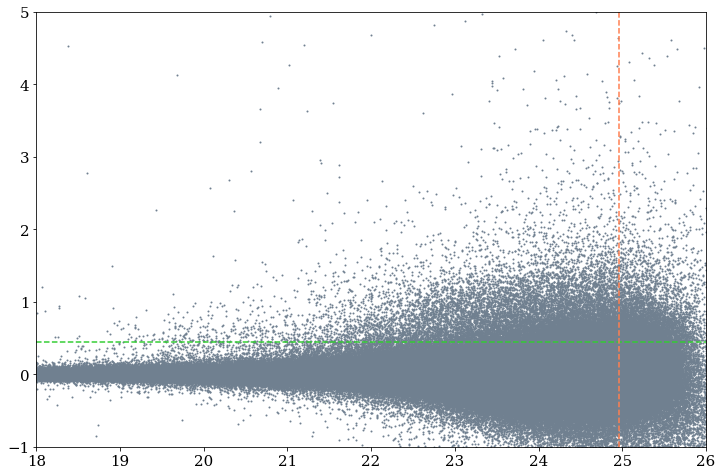

In [21]:
fig, ax= plt.subplots(figsize =(12,8))

ax.scatter(3*cc_crit, BB-NB, color = 'k',alpha =0.8, s=1)
ax.scatter(NB, BB-NB, s =1, color ='slategray')

ax.set_xlim(18,26) 
ax.set_ylim(-1,5)
ax.hlines(ew_end,18,26, linestyle='dashed', color ='limegreen')
ax.vlines(NB_5s,-1,5, linestyle='dashed', color ='coral')
plt.show()